In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib.pyplot import figure

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# EDA Analysis

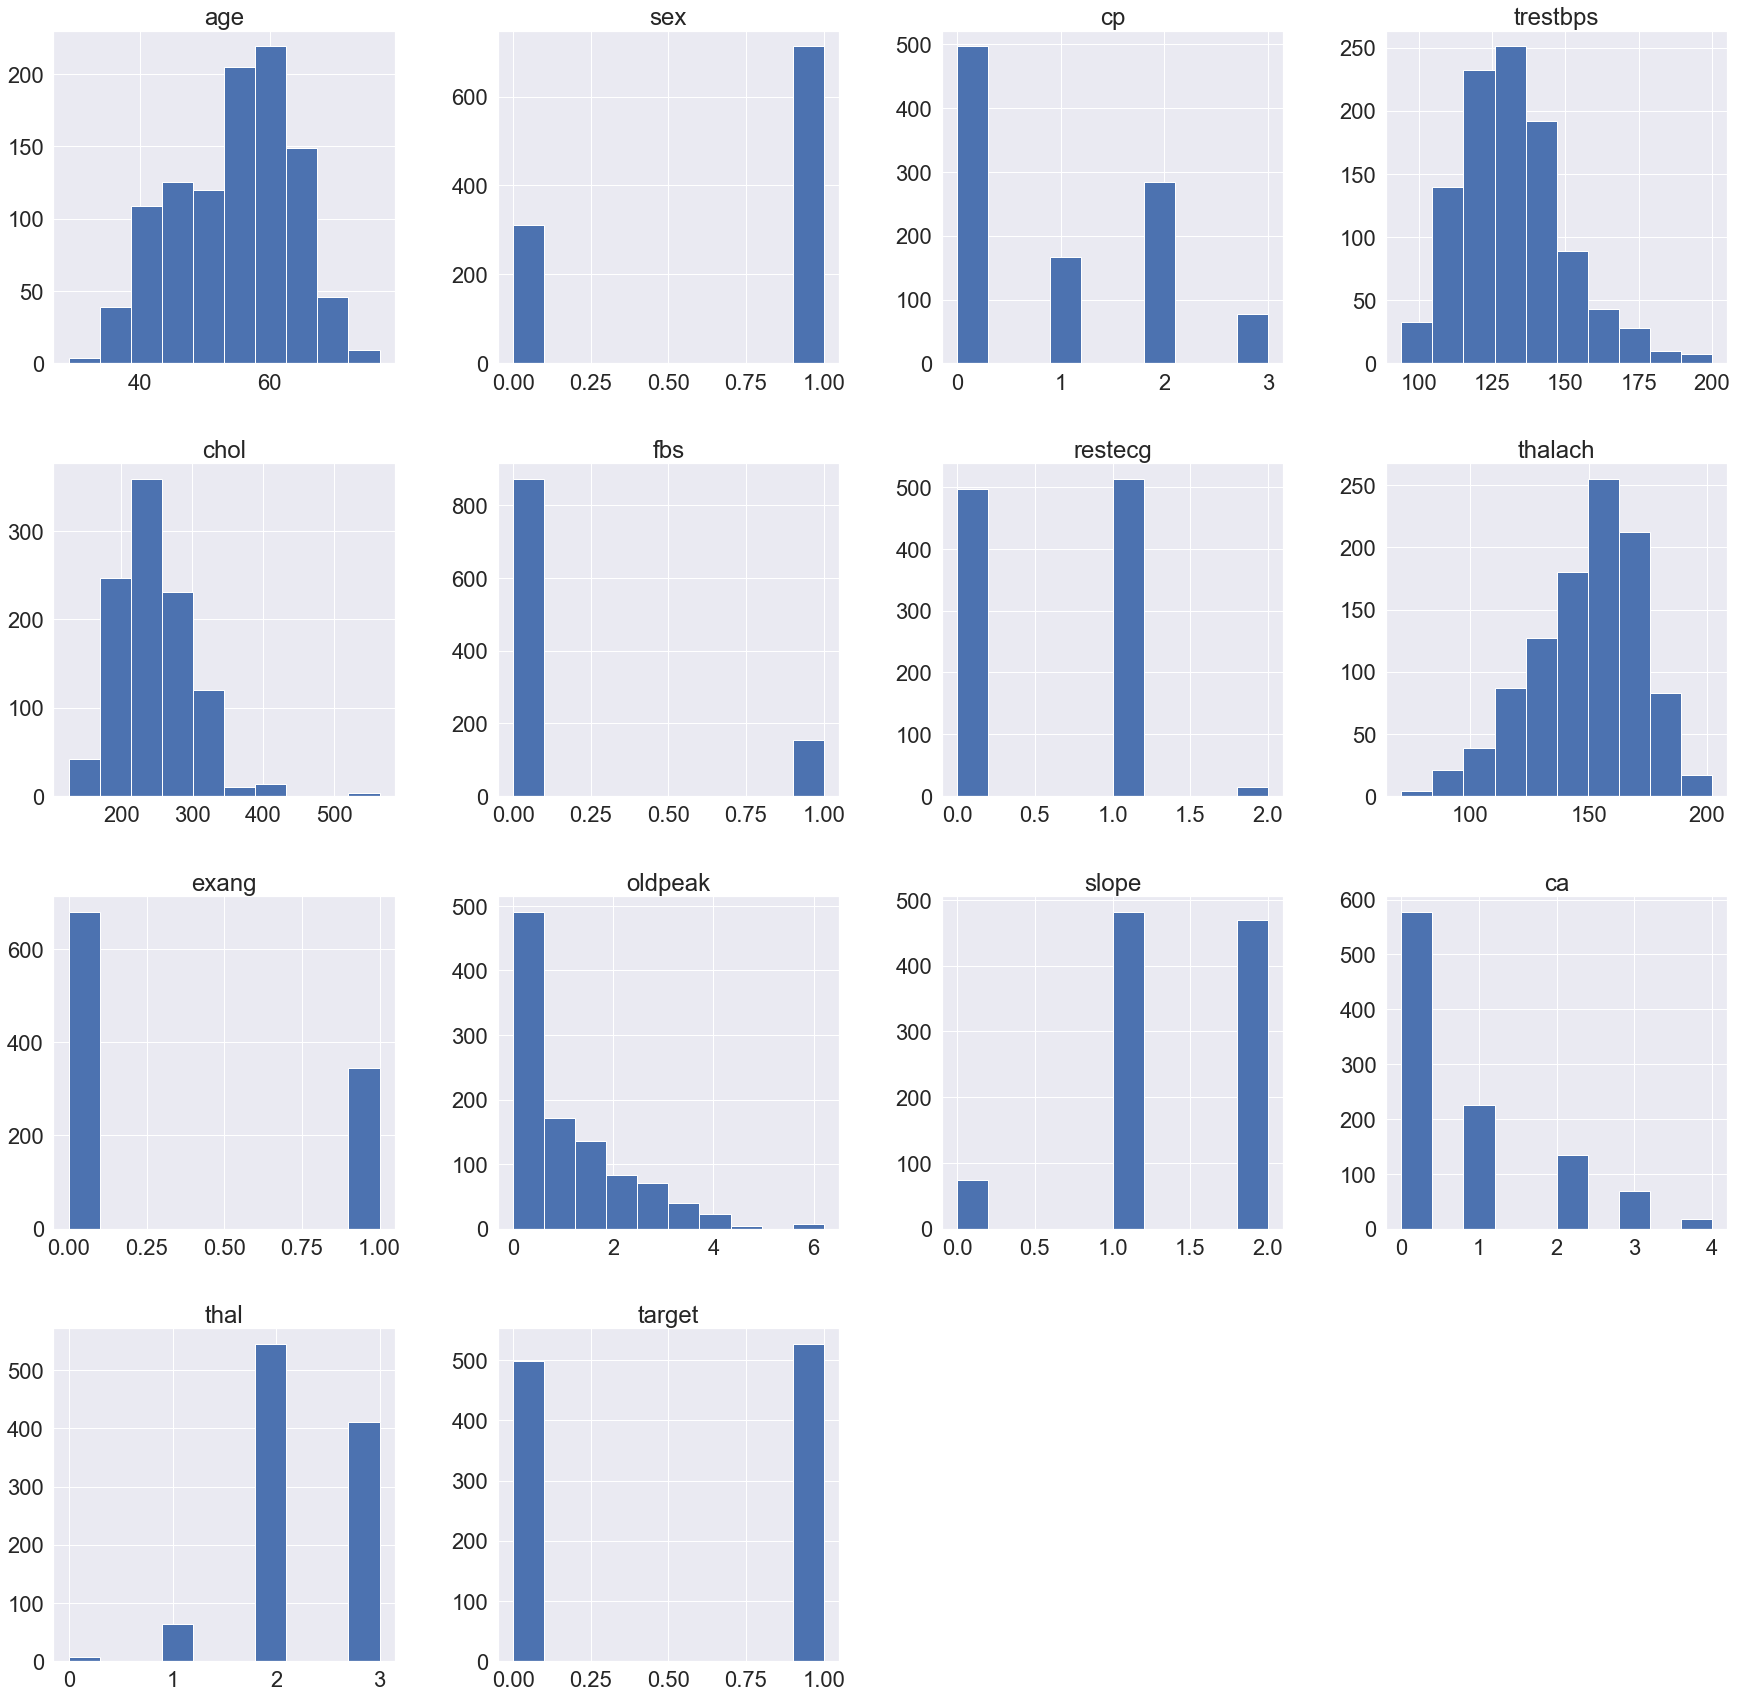

In [7]:
sns.set(font_scale=2)
data.hist(figsize=(30,30))
plt.style.use(['dark_background'])
plt.show()

# Machine Learning Model

In [8]:
A = data.drop('target', axis=1)
B = data['target']

In [10]:
A_train, A_test, B_train, B_test = train_test_split(A, B,  test_size=0.2, random_state=2)

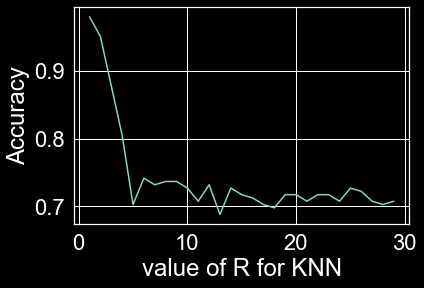

In [18]:
R_range = list(range(1,30))
scores = []

for R in R_range:
    knn = KNeighborsClassifier(n_neighbors=R)
    knn.fit(A_train, B_train)
    B_predicted = knn.predict(A_test)
    scores.append(metrics.accuracy_score(B_test, B_predicted))
    
plt.style.use(['dark_background'])
plt.plot(R_range, scores)
plt.xlabel('value of R for KNN')
plt.ylabel('Accuracy')
plt.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(A_train, B_train)
B_predicted = knn.predict(A_test)
print(B_predicted)
acc = metrics.accuracy_score(B_test, B_predicted)*100
print(f"Accuracy of our ML model is: {acc}")

[0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1]
Accuracy of our ML model is: 95.1219512195122


# Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix as cm

[[101   4]
 [  6  94]]


<AxesSubplot:>

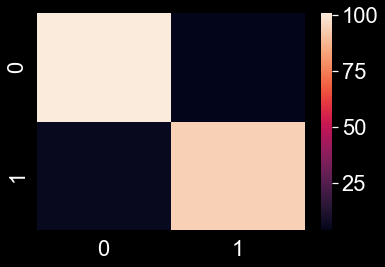

In [23]:
conf = cm(B_test, B_predicted)
print(conf)
sns.heatmap(conf)